In [1]:
# -------------------------------
# Importing necessary libraries
# -------------------------------

# "datasets" library from Hugging Face to load pre-built datasets
from datasets import load_dataset

# Scikit-learn tools for splitting the data and scaling features
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import VarianceThreshold

# Imbalanced-learn method to handle imbalanced datasets
from imblearn.combine import SMOTEENN

# Import the seaborn library for advanced statistical visualizations
import seaborn as sns

# Import matplotlib.pyplot for creating and customizing plots
import matplotlib.pyplot as plt

# Import NumPy for arrays, matrices, and mathematical operations
import numpy as np

# Pandas for data manipulation and analysis
import pandas as pd

## PRE-PROCESSING

In [2]:
# -------------------------------
# Load the dataset and convert to Pandas DataFrame
# -------------------------------

# Load the fraud detection dataset from Hugging Face
dataset = load_dataset("CiferAI/Cifer-Fraud-Detection-Dataset-AF")

# Convert the training split of the dataset to a Pandas DataFrame for easier manipulation
df = dataset["train"].to_pandas()
df = df.sample(200000, random_state=42)

# Convert columns to the best possible dtypes (e.g., int64 → Int64, object → string)
# This helps prevent potential type issues and ensures consistent data types
df = df.convert_dtypes()

README.md: 0.00B [00:00, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-1-(…):   0%|          | 0.00/138M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-10(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-11(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-12(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-13(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-14(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-2-(…):   0%|          | 0.00/138M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-3-(…):   0%|          | 0.00/138M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-4-(…):   0%|          | 0.00/138M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-5-(…):   0%|          | 0.00/131M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-6-(…):   0%|          | 0.00/131M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-7-(…):   0%|          | 0.00/131M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-8-(…):   0%|          | 0.00/131M [00:00<?, ?B/s]

Cifer-Fraud-Detection-Dataset-AF-part-9-(…):   0%|          | 0.00/127M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21000000 [00:00<?, ? examples/s]

In [3]:
# -------------------------------
# Explore basic information about the dataset
# -------------------------------

# Display the first 5 rows to get an overview of the data
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
9811966,147,CASH_IN,329822.99,sdv-pii-1hybr,4806431.42,5947257.03,sdv-pii-a89t7,419530.31,3697373.7,0,0
3361606,450,PAYMENT,20295.13,C1114778583,0.01,499.17,C689793442,4467189.32,1290654.24,0,0
12871380,57,CASH_OUT,32781.69,sdv-pii-suuas,143.37,20.69,sdv-pii-k2ai2,1129675.95,4979770.75,0,0
20899941,210,CASH_OUT,94808.87,C1629867471,974.7,32834.22,C350001556,526137.5,3.11,0,0
4740903,362,CASH_OUT,84063.92,C1758188565,192732.65,417339.55,M1856647425,1131265.84,4833.99,0,0


In [4]:
# Display the shape of the DataFrame (number of rows and columns)
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset shape: 200000 rows x 11 columns


In [5]:
# Display the data types of each column in a readable table
print("Column data types:")
print(df.dtypes.to_frame(name="Data Type"))

Column data types:
                     Data Type
step                     Int64
type            string[python]
amount                 Float64
nameOrig        string[python]
oldbalanceOrg          Float64
newbalanceOrig         Float64
nameDest        string[python]
oldbalanceDest         Float64
newbalanceDest         Float64
isFraud                  Int64
isFlaggedFraud           Int64


In [6]:
# Display descriptive statistics for all columns
# - include="all" ensures statistics are shown for both numerical and categorical columns
# - Transposed (.T) for easier reading, with columns as rows
print("Descriptive statistics for all columns:")
display(df.describe(include="all").T)

Descriptive statistics for all columns:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,200000.0,<NA>,<NA>,<NA>,239.249035,163.409628,1.0,112.0,206.0,333.0,743.0
type,200000,5,CASH_OUT,70658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,200000.0,<NA>,<NA>,<NA>,179475.745505,253228.560255,0.0,18399.35,81976.77,237408.7,3483855.64
nameOrig,200000,198388,C1974079768,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,200000.0,<NA>,<NA>,<NA>,1335516.552125,2574362.118018,0.01,10812.7675,213968.08,1413558.575,35750887.76
newbalanceOrig,200000.0,<NA>,<NA>,<NA>,2079393.586021,3408488.784203,0.0,58746.5375,586091.63,2580848.7825,36256833.17
nameDest,200000,184979,C2106301831,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,200000.0,<NA>,<NA>,<NA>,1926518.922979,2491592.669222,0.02,273717.055,1010771.12,2607313.9775,35288865.77
newbalanceDest,200000.0,<NA>,<NA>,<NA>,3715626.635846,10276866.958544,0.0,98.7825,64563.145,1985963.5075,198182360.57
isFraud,200000.0,<NA>,<NA>,<NA>,0.001295,0.035963,0.0,0.0,0.0,0.0,1.0


In [7]:
# Check for missing values across the entire dataset
total_missing = df.isna().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


In [8]:
# Check for duplicated rows in the dataset
total_duplicates = df.duplicated().sum()
print(f"Total duplicated rows in the dataset: {total_duplicates}")

Total duplicated rows in the dataset: 0


In [9]:
# Select all numeric columns in the DataFrame (integers and floats)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = [col for col in num_cols if df[col].nunique() > 5]

# Create an empty dictionary to store outliers for each column
outliers_dict = {}

# Loop through each numeric column to detect outliers
for col in num_cols:
    # Calculate the first quartile (25th percentile)
    Q1 = df[col].quantile(0.25)
    # Calculate the third quartile (75th percentile)
    Q3 = df[col].quantile(0.75)
    # Compute the interquartile range (IQR)
    IQR = Q3 - Q1
    # Identify outliers: values below Q1 - 3*IQR or above Q3 + 3*IQR
    outliers = df[(df[col] < Q1 - 3*IQR) | (df[col] > Q3 + 3*IQR)]
    # Store the outliers in the dictionary under the column name
    outliers_dict[col] = outliers[col]

# Print the number of outliers for each numeric column
for col, out in outliers_dict.items():
    print(f"{col} : {len(out)} outliers")

step : 0 outliers
amount : 5107 outliers
oldbalanceOrg : 13229 outliers
newbalanceOrig : 8314 outliers
oldbalanceDest : 3951 outliers
newbalanceDest : 25327 outliers


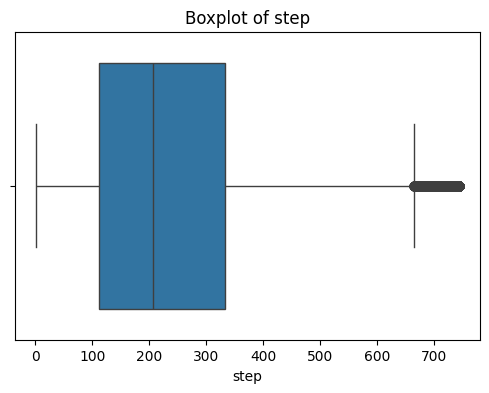

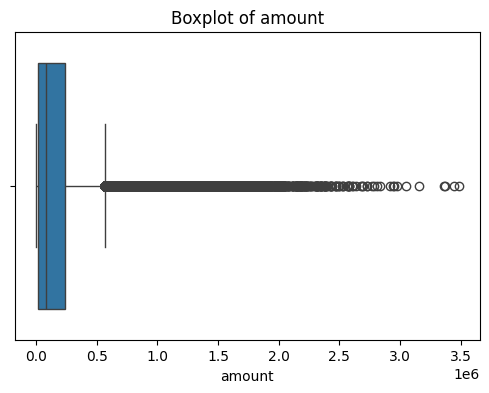

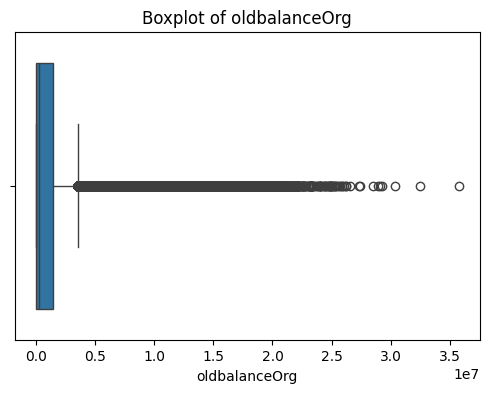

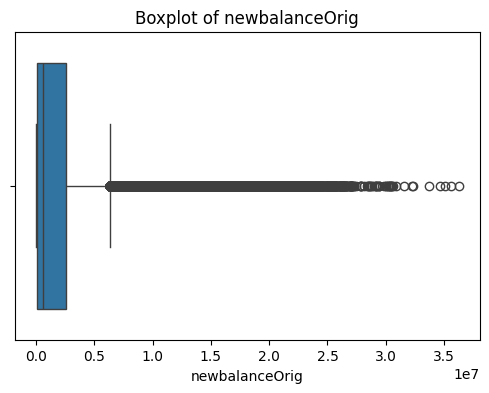

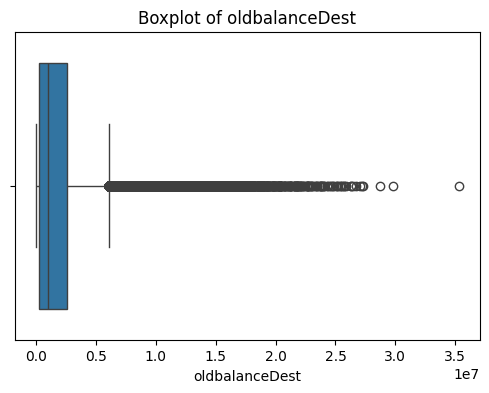

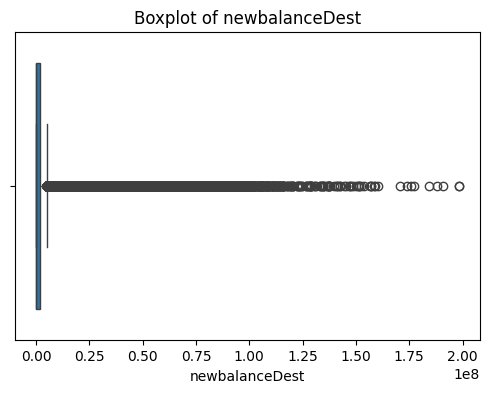

In [10]:
# Loop through each numeric column in the DataFrame
for col in num_cols:
    # Create a new figure with a specific size for better visibility
    plt.figure(figsize=(6, 4))
    
    # Draw a boxplot for the current column
    # The box shows the quartiles and median
    # Points outside the whiskers are considered outliers
    sns.boxplot(x=df[col])
    
    # Add a title to the plot indicating which column it represents
    plt.title(f'Boxplot of {col}')
    
    # Label the x-axis with the column name
    plt.xlabel(col)
    
    # Display the plot
    plt.show()

Since the dataset we are using is fully synthetic, generated from real data, there are no typos or other human errors. Human mistakes are usually the main cause of outliers. Therefore, we will not remove outliers during preprocessing, as doing so could eliminate data that might be important for our model.

In [11]:
# -----------------------------------------------------------------------
# BALANCE-BASED FEATURES
# -----------------------------------------------------------------------

# delta_balance_sender :
# This measures how much money the sender's balance decreased after the transaction.
# In a normal transaction, newbalanceOrig = oldbalanceOrg - amount.
# If this difference does not match the transaction amount, there is an inconsistency.
df["delta_balance_sender"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

# delta_balance_recipient :
# This measures how much the recipient's balance increased after receiving money.
# Normally: newbalanceDest = oldbalanceDest + amount.
# Large or inconsistent changes may indicate suspicious activity.
df["delta_balance_recipient"] = df["newbalanceDest"] - df["oldbalanceDest"]

# abs_delta_sender / abs_delta_recipient :
# The absolute size of balance variations for sender and recipient.
# Large absolute changes tend to occur in suspicious transactions.
df["abs_delta_sender"] = df["delta_balance_sender"].abs()
df["abs_delta_recipient"] = df["delta_balance_recipient"].abs()

# amount_over_oldbalance :
# Ratio comparing the transaction value to the sender's previous balance.
# If this ratio is close to 1, the sender empties almost all their funds → red flag.
df["amount_over_oldbalance"] = df["amount"] / (df["oldbalanceOrg"] + 1)

# amount_over_newbalance :
# Ratio comparing the amount to the sender's remaining balance after the transaction.
# A high value suggests a sudden drop in available funds.
df["amount_over_newbalance"] = df["amount"] / (df["newbalanceOrig"] + 1)

# amount_over_total_balance :
# Ratio comparing the amount to the combined balances of sender and recipient.
# Helps detect disproportionate transfers relative to account wealth.
df["amount_over_total_balance"] = df["amount"] / (df["oldbalanceOrg"] + df["oldbalanceDest"] + 1)

# delta_balance_net :
# Measures the total net change across both accounts.
# For a normal transaction, sender decrease + recipient increase = amount.
# Deviations from this expected pattern often indicate fraud or synthetic data issues.
df["delta_balance_net"] = (df["newbalanceOrig"] - df["oldbalanceOrg"]) + \
                          (df["newbalanceDest"] - df["oldbalanceDest"])

# -----------------------------------------------------------------------
# TYPE-BASED ENCODING
# -----------------------------------------------------------------------

# fraud_rate_per_type :
# Fraud probability of each transaction type (e.g., TRANSFER, CASH_OUT).
# Some types are statistically more fraudulent than others.
fraud_rate_per_type = df.groupby("type")["isFraud"].mean()

# type_encoded :
# Each transaction receives the average fraud risk of its type.
# This captures "some transaction types are riskier than others".
df["type_encoded"] = df["type"].map(fraud_rate_per_type)

# type_times_amount :
# Interaction between transaction type and amount.
# Large amounts in high-risk transaction types raise suspicion dramatically.
df["type_times_amount"] = df["type_encoded"] * df["amount"]

# -----------------------------------------------------------------------
# FLAG / THRESHOLD FEATURES
# -----------------------------------------------------------------------

# high_amount_flag :
# Only equals the transaction amount if "isFlaggedFraud" is triggered.
# This emphasizes very large transactions.
df["high_amount_flag"] = df["isFlaggedFraud"] * df["amount"]

# large_tx :
# Binary indicator: 1 if amount > 50% of sender’s balance.
# Fraudsters often drain accounts quickly.
df["large_tx"] = (df["amount"] > 0.5 * df["oldbalanceOrg"]).astype(int)

# -----------------------------------------------------------------------
# TEMPORAL FEATURES
# -----------------------------------------------------------------------

# hour and day :
# Extract time-of-day and day-of-simulation from the "step" variable.
# Fraud often spikes at night or weekends when monitoring is lighter.
df["hour"] = df["step"] % 24
df["day"] = df["step"] // 24

# is_weekend :
# 1 if transaction occurs on Saturday or Sunday.
df["is_weekend"] = (df["day"] % 7).isin([5, 6]).astype(int)

# is_night :
# 1 if transaction occurs at night (22h → 6h).
# Most fraud attempts happen outside business hours.
df["is_night"] = df["hour"].between(22, 6).astype(int)

# -----------------------------------------------------------------------
# RECIPIENT-RELATED FEATURES
# -----------------------------------------------------------------------

# sender_receiver_same :
# 1 if sender and receiver IDs are identical.
# Rare and suspicious case; useful for detecting synthetic transactions.
df["sender_receiver_same"] = (df["nameOrig"] == df["nameDest"]).astype(int)

# -----------------------------------------------------------------------
# BEHAVIORAL RATIO FEATURES
# -----------------------------------------------------------------------

# amount_over_mean_sender :
# Compare the current amount to sender's average transaction amount.
# Fraud often shows amounts that are unusually high for the account’s history.
df["amount_over_mean_sender"] = df["amount"] / \
    (df.groupby("nameOrig")["amount"].transform("mean") + 1)

# -----------------------------------------------------------------------
# INTERACTION FEATURES
# -----------------------------------------------------------------------

# type_flag_amount :
# Combines:
# - the risk level of the transaction type,
# - the flagged indicator,
# - and the amount.
# This feature sharply increases in likely-fraudulent transactions.
df["type_flag_amount"] = df["type_encoded"] * df["isFlaggedFraud"] * df["amount"]

# delta_sender_over_recipient :
# Compares how much the sender balance decreases vs. how much the recipient balance increases.
# In a perfect transaction, this ratio should be ~1.
# Deviations reveal inconsistencies characteristic of fraud.
df["delta_sender_over_recipient"] = df["delta_balance_sender"] / \
                                    (df["delta_balance_recipient"] + 1)

# -----------------------------------------------------------------------
# SENDER ACTIVITY FEATURES
# -----------------------------------------------------------------------

# sender_tx_count :
# Number of transactions previously made by the sender.
# Fraudulent accounts typically have abnormally low activity (new accounts)
# or abnormally high activity (bot-driven fraud).
df["sender_tx_count"] = df.groupby("nameOrig")["amount"].transform("count")

# sender_total_amount :
# Total amount historically transferred by this sender.
# Fraudsters often attempt a few very large withdrawals, creating anomalies.
df["sender_total_amount"] = df.groupby("nameOrig")["amount"].transform("sum")

# sender_max_amount :
# Maximum amount ever sent by this sender.
# Used to detect if the current transaction is unusually large.
df["sender_max_amount"] = df.groupby("nameOrig")["amount"].transform("max")

# amount_over_sender_max :
# Ratio: current amount / sender’s historical maximum.
# If this ratio > 1, the current transaction is the biggest ever,
# which strongly increases suspicion.
df["amount_over_sender_max"] = df["amount"] / (df.groupby("nameOrig")["amount"].transform("max") + 1)

# -----------------------------------------------------------------------
# RECIPIENT ACTIVITY FEATURES
# -----------------------------------------------------------------------

# recipient_tx_count :
# Number of transactions received by the recipient.
# Fraudsters sometimes redirect stolen funds into a “collector” account
# that receives many transfers.
df["recipient_tx_count"] = df.groupby("nameDest")["amount"].transform("count")

# recipient_total_received :
# Total amount historically received by this recipient.
# A sudden large incoming transfer to a low-activity (“fresh”) recipient
# is usually suspicious.
df["recipient_total_received"] = df.groupby("nameDest")["amount"].transform("sum")

# recipient_heavy_receiver :
# Binary indicator marking recipients who receive an unusually high number of transfers.
# Identifies “mule” accounts used to collect money before laundering.
df["recipient_heavy_receiver"] = (df["recipient_tx_count"] > df["recipient_tx_count"].median()).astype(int)

# -----------------------------------------------------------------------
# BALANCE CONSISTENCY CHECKS
# -----------------------------------------------------------------------

# balance_sender_error :
# For a legitimate transaction:
# newbalanceOrig should equal oldbalanceOrg - amount.
# This feature measures how far the actual transaction deviates from that rule.
# Fraudulent or synthetic transactions often violate balance logic.
df["balance_sender_error"] = (df["oldbalanceOrg"] - df["amount"]) - df["newbalanceOrig"]

# abs_balance_sender_error :
# Absolute deviation from expected sender balance.
# The larger the value, the more suspicious the transaction.
df["abs_balance_sender_error"] = df["balance_sender_error"].abs()

# balance_recipient_error :
# For a normal transfer:
# newbalanceDest should equal oldbalanceDest + amount.
# This feature quantifies inconsistencies for the recipient.
df["balance_recipient_error"] = (df["oldbalanceDest"] + df["amount"]) - df["newbalanceDest"]

# abs_balance_recipient_error :
# Absolute form of the above.
# Large values are strong indicators of fraudulent or buggy data.
df["abs_balance_recipient_error"] = df["balance_recipient_error"].abs()

# balance_error_total :
# Sum of sender and recipient inconsistencies.
# Helps measure global transaction invalidity.
df["balance_error_total"] = df["abs_balance_sender_error"] + df["abs_balance_recipient_error"]

# -----------------------------------------------------------------------
# AMOUNT / BALANCE RELATIONSHIPS
# -----------------------------------------------------------------------

# amount_over_net_balance :
# Ratio of the transaction amount to the combined post-transaction balances
# of both accounts.
# Fraudulent transfers often represent unusually high proportions of account funds.
df["amount_over_net_balance"] = df["amount"] / (df["newbalanceOrig"] + df["newbalanceDest"] + 1)

# -----------------------------------------------------------------------
# TYPE INDICATORS
# -----------------------------------------------------------------------

# is_cash :
# Marks transactions that are CASH_IN or CASH_OUT.
# These operations are statistically high-risk because cash movements are harder to trace.
df["is_cash"] = df["type"].isin(["CASH_OUT", "CASH_IN"]).astype(int)

# is_transfer :
# Marks TRANSFER operations only.
# In the dataset, almost all fraudulent events are TRANSFER or CASH_OUT,
# so this indicator is useful for models.
df["is_transfer"] = df["type"].isin(["TRANSFER"]).astype(int)

# -----------------------------------------------------------------------
# TEMPORAL BEHAVIOR FEATURES
# -----------------------------------------------------------------------

# First, sort transactions chronologically for each sender.
# This ensures temporal features reflect the true sequence of events.
df = df.sort_values(by=["nameOrig", "step"]).reset_index(drop=True)

# time_since_last_tx :
# Time (in hours) since the sender’s previous transaction.
# Fraudsters often make many rapid attempts in short time windows.
# Normal users show stable, regular interval patterns.
df["time_since_last_tx"] = df.groupby("nameOrig")["step"].diff().fillna(-1)

# time_until_next_tx :
# Time until the next transaction (symmetric measure).
# Very tight clusters (e.g., 3 transactions in 10 minutes) often indicate fraud.
df["time_until_next_tx"] = df.groupby("nameOrig")["step"].diff(-1).abs().fillna(-1)

# mean_time_between_tx :
# Sender’s typical transaction spacing.
# Allows us to quantify how "normal" the current timing is for this account.
# Fraudsters who hijack an account usually break the established rhythm.
df["mean_time_between_tx"] = df.groupby("nameOrig")["time_since_last_tx"] \
                               .transform(lambda x: x[x >= 0].mean())

# time_gap_deviation :
# Difference between actual and typical transaction spacing.
# Large positive or negative deviations signal unusual timing behavior.
df["time_gap_deviation"] = (
    df["time_since_last_tx"] - df["mean_time_between_tx"]
)

In [12]:
# -------------------------------
# One-Hot Encoding and Feature Cleanup
# -------------------------------

# Apply one-hot encoding to the "type" column
# - Each transaction type becomes a separate binary column
# - drop_first=False keeps all categories (useful if no baseline is needed)
df = pd.get_dummies(df, columns=["type"], drop_first=False)

# Drop identifier columns that are not useful for modeling
# - "nameOrig" and "nameDest" are anonymized IDs and not predictive
df.drop(columns=["nameDest", "nameOrig"], inplace=True)

# Keep only the numerical columns in the DataFrame, since correlation analysis
# requires numeric data. Then convert all these columns to standard float dtype.
# This ensures that any Pandas extension types (e.g., Int64, Float64 with pd.NA)
# are converted into regular float columns where missing values become np.nan.
df = df.select_dtypes(include=["number"]).astype(float)

In [13]:
# -------------------------------
# Correlation Analysis with the target variable
# -------------------------------

# Compute correlation of all features with "isFraud"
# - Sorted by absolute correlation to highlight the most informative features
corr_with_fraud = df.corr()[["isFraud"]].sort_values(
    by="isFraud",
    key=abs,       # Sort by absolute value
    ascending=False
)
print("Correlation of Features with isFraud:")
print(corr_with_fraud)

Correlation of Features with isFraud:
                              isFraud
isFraud                      1.000000
type_encoded                 0.004817
sender_total_amount         -0.003779
sender_max_amount           -0.003755
amount                      -0.003635
large_tx                    -0.003267
amount_over_mean_sender     -0.003139
balance_sender_error         0.003113
type_times_amount           -0.003105
abs_balance_sender_error    -0.002961
recipient_heavy_receiver     0.002857
delta_balance_sender         0.002746
newbalanceOrig              -0.002611
amount_over_oldbalance      -0.002608
abs_delta_sender            -0.002548
amount_over_newbalance      -0.002498
sender_tx_count             -0.002400
time_until_next_tx          -0.002376
is_transfer                 -0.002308
hour                         0.002021
recipient_total_received    -0.002003
recipient_tx_count           0.001909
balance_error_total         -0.001814
amount_over_sender_max      -0.001798
is_cash     

In [14]:
# -------------------------------------------------------------
# Variance-based feature removal
# -------------------------------------------------------------
# The objective of this section is to remove features that contain
# very little variation in their values. Such features do not help
# a model learn meaningful patterns and often increase noise.

# Some features should NOT be removed even if their variance is low.
# For example:
# - binary features (0/1)
# - small discrete sets (e.g., day of week, hour of day)
protected_columns = [
    col for col in df.columns
    if df[col].nunique() < 6
]

# All columns except the protected ones are given to VarianceThreshold.
columns_for_variance = [
    col for col in df.columns
    if col not in protected_columns
]

# threshold=0.01 means:
# "Remove features whose variance is less than 1%".
selector = VarianceThreshold(threshold=0.01)

# Fit the selector on the subset of columns to analyze
selector.fit(df[columns_for_variance])

# Extract the columns that passed the variance filter
kept_columns_after_variance = df[columns_for_variance].columns[
    selector.get_support()
]

# Combine protected features + features with enough variance
final_columns = list(protected_columns) + list(kept_columns_after_variance)

# Identify columns to drop (low-variance AND not protected)
columns_to_drop = [
    col for col in columns_for_variance
    if col not in kept_columns_after_variance
]

print("Columns dropped due to low variance:")
for col in columns_to_drop:
    print(f"  - {col}")

df_allcolumns = df.copy()
# Drop low-variance columns from the dataframe
df.drop(columns=columns_to_drop, inplace=True)

Columns dropped due to low variance:
  - amount_over_sender_max


This code is used to quickly estimate the importance of each feature in the dataset for predicting fraud, without training a full-scale model on the entire dataset.
1. Sampling: Only 10% of the training data is selected (X_sample and y_sample) to reduce computation time while still capturing useful patterns.
2. ExtraTreesClassifier: This ensemble method is chosen because it is fast, robust, and can handle many features. It aggregates multiple randomized decision trees to estimate feature importance.
3. Feature importance extraction: After fitting the classifier on the sampled data, feature_importances_ provides a quantitative measure of how informative each feature is for predicting fraud.
4. Ranking features: Sorting the importance values helps identify the top features that contribute most to fraud detection, which can guide feature selection or further analysis.

Overall, this approach allows you to prioritize features and gain insights into which variables are most relevant before committing to a full model training, saving both time and computational resources.

<Figure size 1200x2150 with 0 Axes>

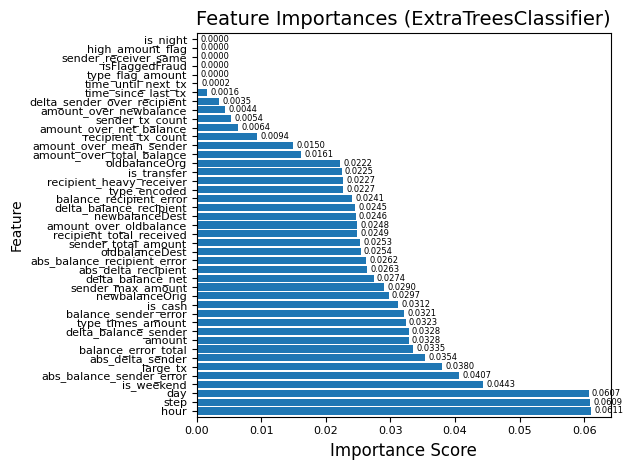

Selected 13 features above importance threshold 0.03
['hour', 'step', 'day', 'is_weekend', 'abs_balance_sender_error', 'large_tx', 'abs_delta_sender', 'balance_error_total', 'amount', 'delta_balance_sender', 'type_times_amount', 'balance_sender_error', 'is_cash']


In [15]:
# -------------------------------------------------------------
# Feature importance estimation using ExtraTreesClassifier
# -------------------------------------------------------------
# ExtraTrees is a very fast tree-based ensemble method that provides
# reliable feature importance ranking. It is much faster than
# RandomForest and works well even on large tabular datasets.

# Separate features and target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# Clip extremely large values to avoid numerical overflow
X = X.clip(-1e10, 1e10)

# Subsample the dataset for efficiency
# Training ExtraTrees on very large datasets can require several minutes.
# Using a 10% random sample provides an accurate approximation while
# dramatically reducing computation time.
sample_size = int(0.10 * len(X))  # Use 10% of the dataset
X_sample = X.sample(sample_size, random_state=42)
y_sample = y.loc[X_sample.index]  # Match target labels to sampled rows

# If still too large, further reduce to a maximum of 500,000 samples
if len(X_sample) > 500_000:
    X_sample, _, y_sample, _ = train_test_split(
        X_sample,
        y_sample,
        train_size=500_000,
        stratify=y_sample,
        random_state=42
    )

# Train the ExtraTrees model
# class_weight="balanced" is very important for fraud detection,
# because the dataset is extremely imbalanced (far more legitimate
# transactions than fraudulent ones).
model = ExtraTreesClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

model.fit(X_sample, y_sample)

# Extract and sort feature importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(12, max(15, len(importance_df) * 0.50)))

ax = importance_df.plot(
    x="feature",
    y="importance",
    kind="barh",
    fontsize=8,
    legend=False,
    width=0.8
)

plt.title("Feature Importances (ExtraTreesClassifier)", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=10)

# Add textual annotation of importance values next to bars
for i, importance_value in enumerate(importance_df["importance"]):
    ax.text(
        importance_value + 0.0005,
        i,
        f"{importance_value:.4f}",
        fontsize=6,
        va="center"
    )

plt.tight_layout()
plt.show()

# Select features using an importance threshold
importance_threshold = 0.03  # Features below this importance are removed

selected_features = importance_df[
    importance_df["importance"] >= importance_threshold
]["feature"].tolist()

print(f"Selected {len(selected_features)} features above importance threshold {importance_threshold}")
print(selected_features)

# Create reduced dataset including only selected features + target
df = df[selected_features + ["isFraud"]]

Principal Component Analysis (PCA) was not used in this project for several reasons. First, the dataset contains features that have meaningful real-world interpretations, such as transaction amounts, balances and frequency-related variables. Applying PCA would transform these features into abstract linear combinations that are harder to interpret, which reduces the explainability of the fraud detection model.

Second, PCA is mostly beneficial when the feature space is very high-dimensional or highly correlated. In this dataset, the number of features is relatively small and manageable, and the correlations do not justify a dimensionality reduction step. As a result, PCA would add unnecessary complexity without providing substantial performance gains.

Finally, many machine learning models used in fraud detection (such as tree-based algorithms) do not require standardized or orthogonal features and are already robust to correlated variables. Therefore, PCA would not significantly improve model performance and might even degrade it by removing information relevant for classification.

For these reasons, PCA was intentionally not applied in the preprocessing pipeline.

In [16]:
# -----------------------------------------------------------
# Separate features (X) and target label (y)
# -----------------------------------------------------------

X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# -----------------------------------------------------------
# Clip extreme numeric values to avoid instability during scaling
# This prevents numerical overflow issues.
# -----------------------------------------------------------

X = X.clip(-1e10, 1e10)

In [17]:
# -----------------------------------------------------------
# Split (80% train, 20% test) while preserving class distribution (stratification)
# -----------------------------------------------------------

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------------------------------------
# Further split training set into training (75%) and validation (25%)
# Validation is used for model tuning and early stopping.
# -----------------------------------------------------------

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

# -----------------------------------------------------------
# Standardize numerical features using RobustScaler
# Scaling helps models like logistic regression, SVM, and neural networks.
# -----------------------------------------------------------

scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
# -----------------------------------------------------------
# Apply SMOTEENN to handle class imbalance on the training set.
# SMOTEENN combines oversampling (SMOTE) and cleaning (ENN),
# improving minority class representation while removing noisy samples.
# -----------------------------------------------------------

smote_enn = SMOTEENN(random_state=42)
X_train, y_train = smote_enn.fit_resample(X_train, y_train)

In [34]:
# -----------------------------------------------------------
# Save datasets to Parquet format for efficient storage and fast loading.
# Parquet offers columnar storage and good compression.
# -----------------------------------------------------------

output_path = "./data/"

df_allcolumns.to_parquet(f"{output_path}df_allcolumns.parquet", index=False)
df.to_parquet(f"{output_path}df.parquet", index=False)
X_train.to_parquet(f"{output_path}X_train.parquet", index=False)
X_test.to_parquet(f"{output_path}X_test.parquet", index=False)
X_val.to_parquet(f"{output_path}X_val.parquet", index=False)
y_train.to_frame(name="isFraud").to_parquet(f"{output_path}y_train.parquet", index=False)
y_test.to_frame(name="isFraud").to_parquet(f"{output_path}y_test.parquet", index=False)
y_val.to_frame(name="isFraud").to_parquet(f"{output_path}y_val.parquet", index=False)

print(f"Train set : {len(X_train)} samples ({y_train.mean():.2%} fraud)")
print(f"Val set   : {len(X_val)} samples ({y_val.mean():.2%} fraud)")
print(f"Test set  : {len(X_test)} samples ({y_test.mean():.2%} fraud)")

Train set : 160000 samples (0.13% fraud)
Val set   : 20000 samples (0.13% fraud)
Test set  : 20000 samples (0.13% fraud)


## Load Parquet


Use the following code to load the preprocessed datasets without having to run the entire preprocessing pipeline again.

In [40]:
# -----------------------------------------------------------
# Load preprocessed datasets from Parquet files
# -----------------------------------------------------------
# This allows you to skip the entire preprocessing pipeline
# and directly load the cleaned and processed data.

import pandas as pd

# Define the path where Parquet files are stored
data_path = "./data/"

# Load the complete preprocessed DataFrame
df = pd.read_parquet(f"{data_path}df.parquet")
df_allcolumns = pd.read_parquet(f"{data_path}df_allcolumns.parquet")

# Load training, validation, and test sets
X_train = pd.read_parquet(f"{data_path}X_train.parquet")
X_val = pd.read_parquet(f"{data_path}X_val.parquet")
X_test = pd.read_parquet(f"{data_path}X_test.parquet")

# Load target variables
y_train = pd.read_parquet(f"{data_path}y_train.parquet")["isFraud"]
y_val = pd.read_parquet(f"{data_path}y_val.parquet")["isFraud"]
y_test = pd.read_parquet(f"{data_path}y_test.parquet")["isFraud"]

# Display information about loaded datasets
print("=" * 60)
print("Preprocessed datasets loaded successfully!")
print("=" * 60)
print(f"\nDataFrame: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Complete DataFrame: {df_allcolumns.shape[0]:,} rows × {df_allcolumns.shape[1]} columns")
print(f"\nTraining set:   {len(X_train):,} samples ({y_train.mean():.2%} fraud)")
print(f"Validation set: {len(X_val):,} samples ({y_val.mean():.2%} fraud)")
print(f"Test set:       {len(X_test):,} samples ({y_test.mean():.2%} fraud)")
print(f"\nFeatures: {list(X_train.columns)[:5]} ... ({len(X_train.columns)} total)")
print("=" * 60)

Preprocessed datasets loaded successfully!

DataFrame: 200,000 rows × 14 columns
Complete DataFrame: 200,000 rows × 45 columns

Training set:   160,000 samples (0.13% fraud)
Validation set: 20,000 samples (0.13% fraud)
Test set:       20,000 samples (0.13% fraud)

Features: ['hour', 'step', 'day', 'is_weekend', 'abs_balance_sender_error'] ... (13 total)


## Statistics Test

MUTUAL INFORMATION ANALYSIS

Calculating Mutual Information scores (this may take a moment)...

Calculation complete! Top 20 features by Mutual Information:
                    Feature  MI_Score
         recipient_tx_count  0.041608
                    is_cash  0.037948
            sender_tx_count  0.031387
                   large_tx  0.028286
               type_encoded  0.014183
                 is_weekend  0.008294
         time_until_next_tx  0.007747
         time_since_last_tx  0.007655
   recipient_heavy_receiver  0.002466
                       hour  0.002008
                        day  0.001830
                is_transfer  0.001110
                       step  0.000183
abs_balance_recipient_error  0.000070
          type_times_amount  0.000065
             isFlaggedFraud  0.000052
     amount_over_oldbalance  0.000052
    amount_over_net_balance  0.000046
                     amount  0.000040
             newbalanceOrig  0.000036

Calculation complete! Top 20 features by Mut

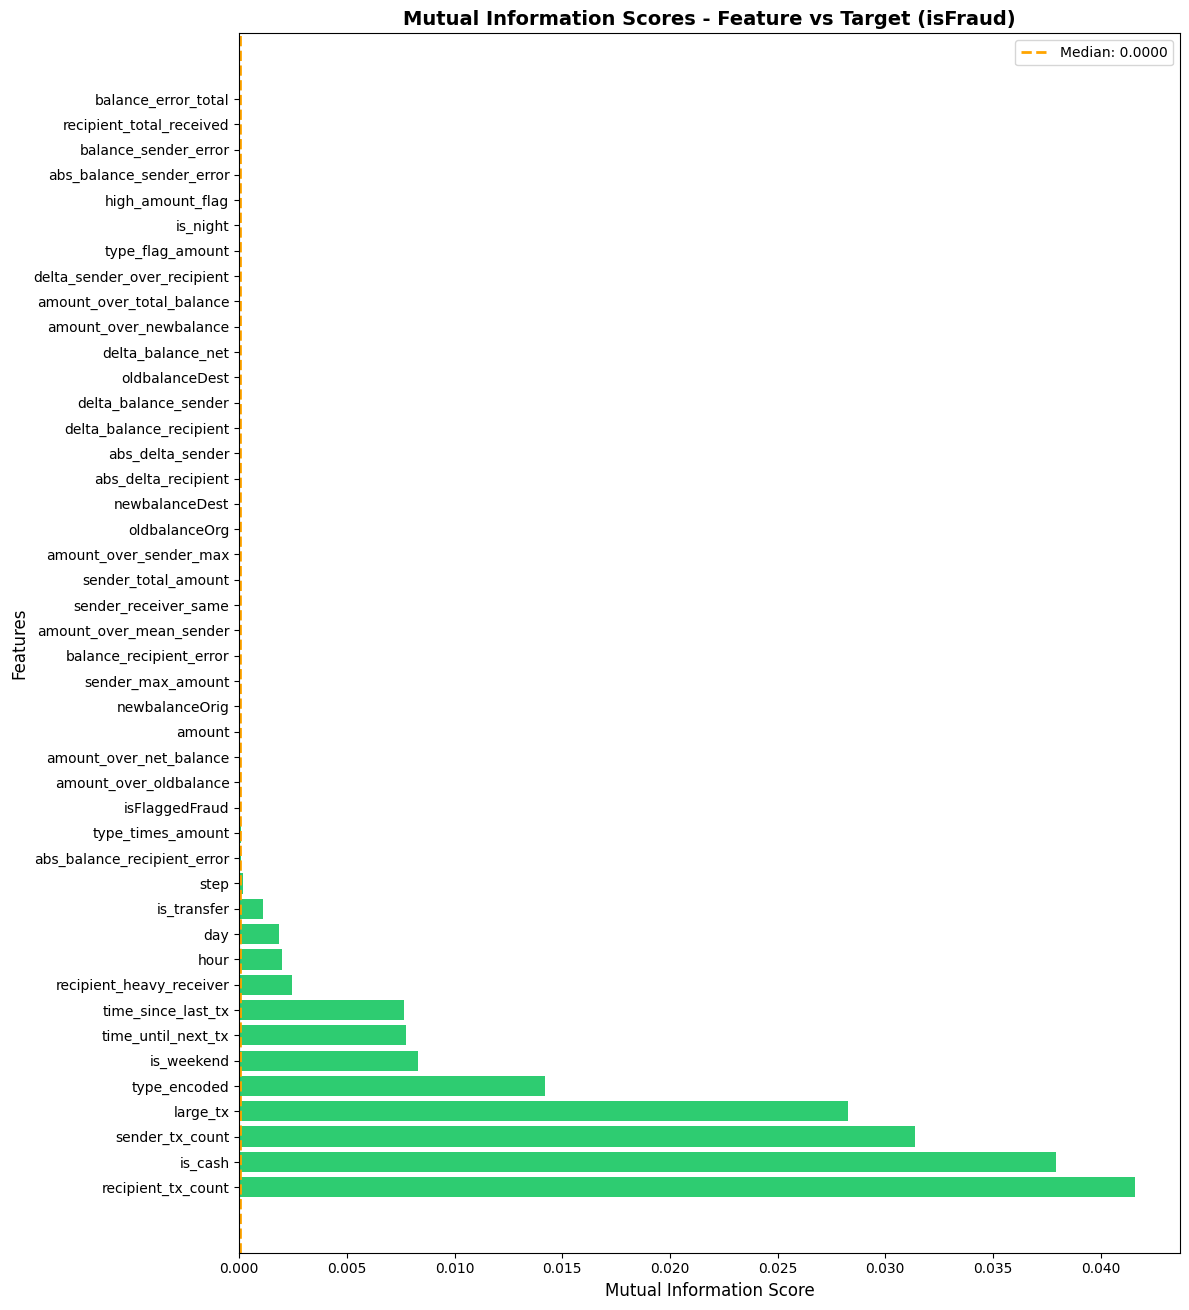


Statistical Summary of MI Scores:
   • Mean:   0.0042
   • Median: 0.0000
   • Std:    0.0103
   • Max:    0.0416
   • Min:    0.0000

Features with MI < 0.01: 39
   ['is_weekend', 'time_until_next_tx', 'time_since_last_tx', 'recipient_heavy_receiver', 'hour', 'day', 'is_transfer', 'step', 'abs_balance_recipient_error', 'type_times_amount']...


In [ ]:
# ============================================================================
# 1. MUTUAL INFORMATION (MI) ANALYSIS
# ============================================================================
# Mutual Information measures the mutual dependence between variables.
# It captures both linear and non-linear relationships.
# Higher MI score = stronger relationship with the target variable.

from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("MUTUAL INFORMATION ANALYSIS")
print("="*70)

# Prepare data for MI calculation
# Use original non-scaled data from df for better interpretability
X_mi = df_allcolumns.drop("isFraud", axis=1)
y_mi = df_allcolumns["isFraud"]

# Calculate Mutual Information scores
# This may take a few minutes on large datasets
print("\nCalculating Mutual Information scores ...")
mi_scores = mutual_info_classif(
    X_mi, 
    y_mi, 
    discrete_features='auto',
    random_state=42,
    n_neighbors=3  # Reduced for faster computation
)

# Create DataFrame with MI scores
mi_df = pd.DataFrame({
    'Feature': X_mi.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

# Display top features
print(f"\nTop 20 features by Mutual Information:")
print(mi_df.head(20).to_string(index=False))

# Visualize MI scores
plt.figure(figsize=(12, max(8, len(mi_df) * 0.3)))
colors = ['#2ecc71' if score > mi_df['MI_Score'].median() else '#e74c3c' 
          for score in mi_df['MI_Score']]

plt.barh(mi_df['Feature'], mi_df['MI_Score'], color=colors)
plt.xlabel('Mutual Information Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Mutual Information Scores - Feature vs Target (isFraud)', fontsize=14, fontweight='bold')
plt.axvline(mi_df['MI_Score'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f"Median: {mi_df['MI_Score'].median():.4f}")
plt.legend()
plt.tight_layout()
plt.show()

# Statistical summary
print(f"\nStatistical Summary of MI Scores:")
print(f"   • Mean:   {mi_df['MI_Score'].mean():.4f}")
print(f"   • Median: {mi_df['MI_Score'].median():.4f}")
print(f"   • Std:    {mi_df['MI_Score'].std():.4f}")
print(f"   • Max:    {mi_df['MI_Score'].max():.4f}")
print(f"   • Min:    {mi_df['MI_Score'].min():.4f}")

# Identify low-information features
low_mi_threshold = 0.01
low_mi_features = mi_df[mi_df['MI_Score'] < low_mi_threshold]['Feature'].tolist()
print(f"\nFeatures with MI < {low_mi_threshold}: {len(low_mi_features)}")
if low_mi_features:
    print(f"   {low_mi_features[:10]}" + ("..." if len(low_mi_features) > 10 else ""))


ANOVA F-TEST & CHI² ANALYSIS

Feature classification:
   • Continuous features: 32
   • Binary/Categorical features: 12

Running ANOVA F-test on 32 continuous features...

ANOVA Results - Top 15 continuous features:
                 Feature  F_Score  p_value  Significant
     sender_total_amount 2.856625 0.091000        False
       sender_max_amount 2.820639 0.093061        False
                  amount 2.642766 0.104024        False
 amount_over_mean_sender 1.970113 0.160437        False
    balance_sender_error 1.937709 0.163919        False
       type_times_amount 1.927991 0.164980        False
abs_balance_sender_error 1.753425 0.185448        False
    delta_balance_sender 1.508648 0.219347        False
          newbalanceOrig 1.363934 0.242858        False
  amount_over_oldbalance 1.360497 0.243453        False
        abs_delta_sender 1.298291 0.254527        False
  amount_over_newbalance 1.247849 0.263965        False
      time_until_next_tx 1.129008 0.287988        False

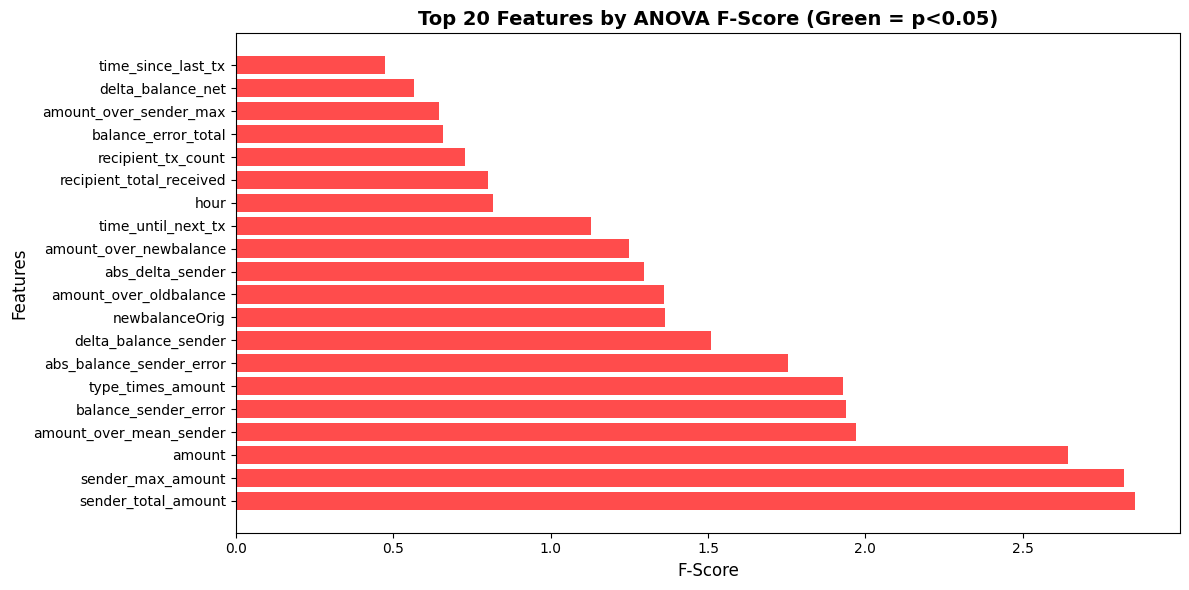


Running Chi² test on 12 binary/categorical features...

Chi² Results - Top 15 categorical features:
                 Feature  Chi2_Score  p_value  Significant
            type_encoded    4.640285 0.326236        False
                large_tx    1.956170 0.161924        False
recipient_heavy_receiver    1.411047 0.234883        False
         sender_tx_count    1.152168 0.562095        False
             is_transfer    0.845966 0.357696        False
                 is_cash    0.490744 0.483596        False
        type_flag_amount    0.002593 0.998704        False
        high_amount_flag    0.002593 0.998704        False
          isFlaggedFraud    0.000000 1.000000        False
    sender_receiver_same    0.000000 1.000000        False
              is_weekend    0.000000 1.000000        False
                is_night    0.000000 1.000000        False

Chi² Summary:
   • Significant features (p < 0.05): 0/12
   • Non-significant features: 12

Chi² Results - Top 15 categorical featu

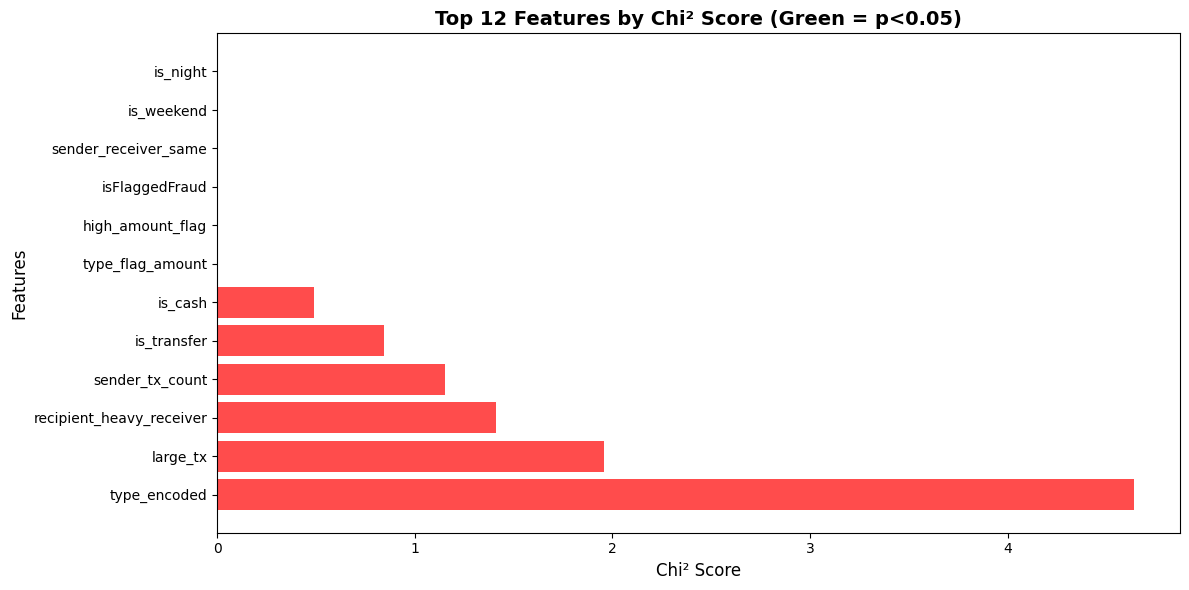

In [42]:
# ============================================================================
# 2. ANOVA F-TEST & CHI² TEST
# ============================================================================
# ANOVA F-test: For continuous features, tests if means differ between classes
# Chi² test: For categorical/binary features, tests independence from target
# Both tests provide p-values: lower p-value = stronger evidence of relationship

from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency

print("\n" + "="*70)
print("ANOVA F-TEST & CHI² ANALYSIS")
print("="*70)

# Identify binary/categorical features (small number of unique values)
binary_features = [col for col in X_mi.columns if X_mi[col].nunique() <= 5]
continuous_features = [col for col in X_mi.columns if col not in binary_features]

print(f"\nFeature classification:")
print(f"   • Continuous features: {len(continuous_features)}")
print(f"   • Binary/Categorical features: {len(binary_features)}")

# --- ANOVA F-test for continuous features ---
if continuous_features:
    print(f"\nRunning ANOVA F-test on {len(continuous_features)} continuous features...")
    
    # Ensure no negative values for some implementations
    X_continuous = X_mi[continuous_features].copy()
    
    # Calculate F-statistic and p-values
    f_scores, p_values_f = f_classif(X_continuous, y_mi)
    
    # Create results DataFrame
    anova_df = pd.DataFrame({
        'Feature': continuous_features,
        'F_Score': f_scores,
        'p_value': p_values_f,
        'Significant': p_values_f < 0.05
    }).sort_values('F_Score', ascending=False)
    
    print(f"\nANOVA Results - Top 15 continuous features:")
    print(anova_df.head(15).to_string(index=False))
    
    # Summary
    significant_count = anova_df['Significant'].sum()
    print(f"\nANOVA Summary:")
    print(f"   • Significant features (p < 0.05): {significant_count}/{len(continuous_features)}")
    print(f"   • Non-significant features: {len(continuous_features) - significant_count}")
    
    # Visualize top F-scores
    plt.figure(figsize=(12, 6))
    top_anova = anova_df.head(20)
    colors_anova = ['green' if sig else 'red' for sig in top_anova['Significant']]
    plt.barh(top_anova['Feature'], top_anova['F_Score'], color=colors_anova, alpha=0.7)
    plt.xlabel('F-Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Top 20 Features by ANOVA F-Score (Green = p<0.05)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# --- Chi² test for categorical features ---
if binary_features:
    print(f"\nRunning Chi² test on {len(binary_features)} binary/categorical features...")
    
    chi2_results = []
    
    for feature in binary_features:
        try:
            # Create contingency table
            contingency_table = pd.crosstab(X_mi[feature], y_mi)
            
            # Perform Chi² test
            chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
            
            chi2_results.append({
                'Feature': feature,
                'Chi2_Score': chi2_stat,
                'p_value': p_val,
                'Significant': p_val < 0.05
            })
        except Exception as e:
            print(f"   ⚠️  Skipping {feature}: {str(e)}")
    
    # Create results DataFrame
    chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Score', ascending=False)
    
    print(f"\nChi² Results - Top 15 categorical features:")
    print(chi2_df.head(15).to_string(index=False))
    
    # Summary
    significant_chi2 = chi2_df['Significant'].sum()
    print(f"\nChi² Summary:")
    print(f"   • Significant features (p < 0.05): {significant_chi2}/{len(binary_features)}")
    print(f"   • Non-significant features: {len(binary_features) - significant_chi2}")
    
    # Visualize top Chi² scores
    plt.figure(figsize=(12, 6))
    top_chi2 = chi2_df.head(min(20, len(chi2_df)))
    colors_chi2 = ['green' if sig else 'red' for sig in top_chi2['Significant']]
    plt.barh(top_chi2['Feature'], top_chi2['Chi2_Score'], color=colors_chi2, alpha=0.7)
    plt.xlabel('Chi² Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'Top {len(top_chi2)} Features by Chi² Score (Green = p<0.05)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


COMPARATIVE ANALYSIS OF ALL FEATURE SELECTION METHODS

TOP 20 FEATURES - COMBINED RANKING (All Methods):
                 Feature  MI_Score_Norm  ANOVA_Score_Norm  Chi2_Score_Norm  Combined_Score
            type_encoded       0.340866          0.000000         1.000000        0.446955
      recipient_tx_count       1.000000          0.254645         0.000000        0.418215
                large_tx       0.679817          0.000000         0.421562        0.367126
                 is_cash       0.912029          0.000000         0.105757        0.339262
         sender_tx_count       0.754351          0.000000         0.248297        0.334216
     sender_total_amount       0.000382          1.000000         0.000000        0.333461
       sender_max_amount       0.000675          0.987392         0.000000        0.329356
                  amount       0.000952          0.925073         0.000000        0.308675
 amount_over_mean_sender       0.000415          0.689405         0.000000 

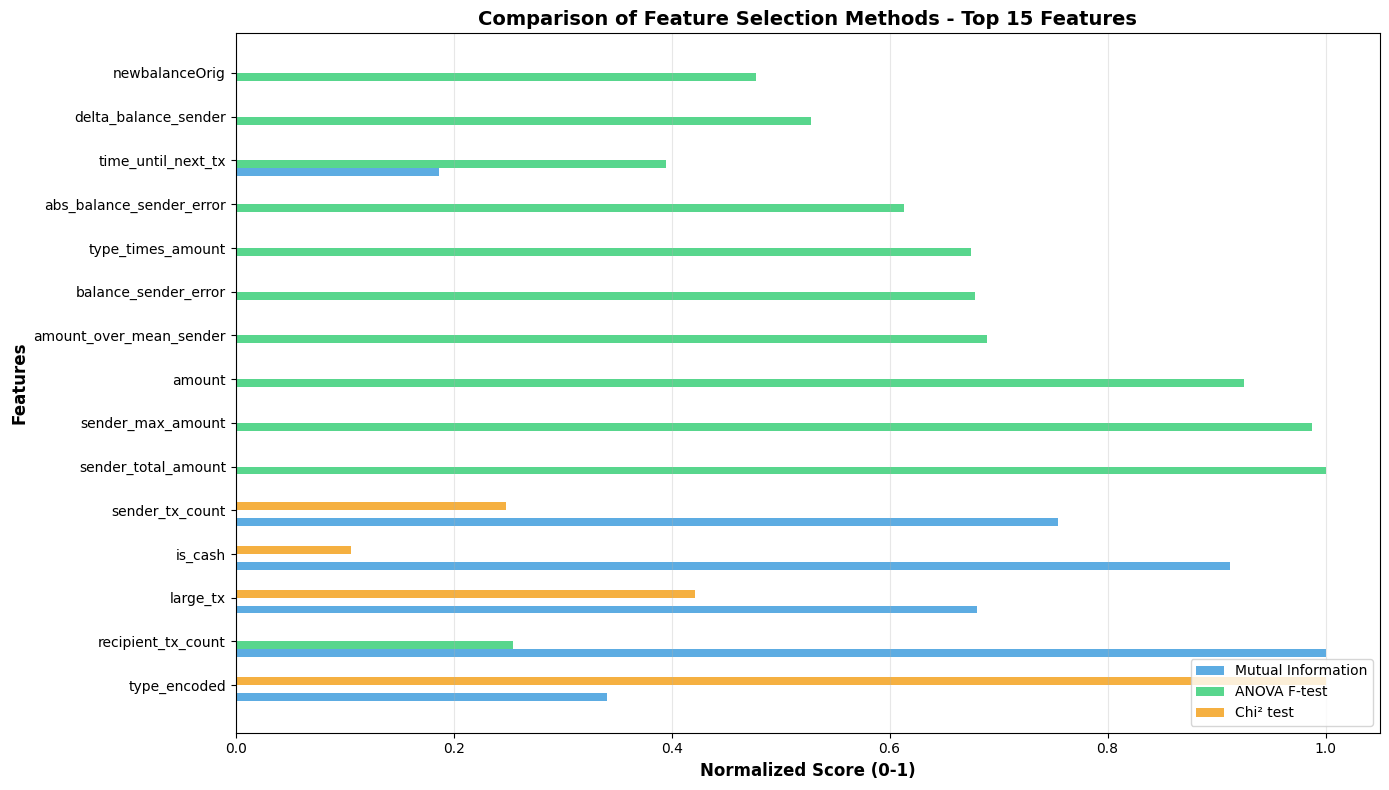


CONSENSUS FEATURES (Top 5 in at least 3 methods):
   No features appear in top 5 of at least 3 methods

OVERALL SUMMARY:
   • Total features analyzed: 44
   • Features with combined score > 0.5: 0
   • Features with combined score > 0.3: 8
   • Recommended minimum features to keep: 8

STATISTICAL ANALYSIS COMPLETE!


In [44]:
# ============================================================================
# 3. COMPARATIVE ANALYSIS - ALL STATISTICAL METHODS
# ============================================================================
# Compare results from all three feature selection methods to identify
# the most consistently important features across different statistical tests.

print("\n" + "="*70)
print("COMPARATIVE ANALYSIS OF ALL FEATURE SELECTION METHODS")
print("="*70)

# Normalize scores to 0-1 range for fair comparison
from sklearn.preprocessing import MinMaxScaler

scaler_norm = MinMaxScaler()

# Prepare DataFrames with normalized scores
comparison_df = pd.DataFrame({'Feature': X_mi.columns})

# Add Mutual Information (normalized)
mi_norm = mi_df.set_index('Feature')['MI_Score']
mi_norm_scaled = pd.Series(
    scaler_norm.fit_transform(mi_norm.values.reshape(-1, 1)).flatten(),
    index=mi_norm.index
)
comparison_df['MI_Score_Norm'] = comparison_df['Feature'].map(
    lambda x: mi_norm_scaled.loc[x] if x in mi_norm_scaled.index else 0
)

# Add ANOVA F-scores (normalized) for continuous features
if continuous_features and len(anova_df) > 0:
    anova_norm = anova_df.set_index('Feature')['F_Score']
    anova_norm_scaled = pd.Series(
        scaler_norm.fit_transform(anova_norm.values.reshape(-1, 1)).flatten(),
        index=anova_norm.index
    )
    comparison_df['ANOVA_Score_Norm'] = comparison_df['Feature'].map(
        lambda x: anova_norm_scaled.loc[x] if x in anova_norm_scaled.index else 0
    )
else:
    comparison_df['ANOVA_Score_Norm'] = 0

# Add Chi² scores (normalized) for categorical features
if binary_features and len(chi2_df) > 0:
    chi2_norm = chi2_df.set_index('Feature')['Chi2_Score']
    chi2_norm_scaled = pd.Series(
        scaler_norm.fit_transform(chi2_norm.values.reshape(-1, 1)).flatten(),
        index=chi2_norm.index
    )
    comparison_df['Chi2_Score_Norm'] = comparison_df['Feature'].map(
        lambda x: chi2_norm_scaled.loc[x] if x in chi2_norm_scaled.index else 0
    )
else:
    comparison_df['Chi2_Score_Norm'] = 0


# Calculate combined score (average of all methods)
comparison_df['Combined_Score'] = comparison_df[[
    'MI_Score_Norm', 
    'ANOVA_Score_Norm', 
    'Chi2_Score_Norm', 
]].mean(axis=1)

# Sort by combined score
comparison_df = comparison_df.sort_values('Combined_Score', ascending=False)

# Display top features
print("\nTOP 20 FEATURES - COMBINED RANKING (All Methods):")
print(comparison_df.head(20).to_string(index=False))

# Visualize comparison for top features
top_n = 15
top_features = comparison_df.head(top_n)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(top_features))
width = 0.18

bars1 = ax.barh(x - 1.5*width, top_features['MI_Score_Norm'], width, 
                label='Mutual Information', color='#3498db', alpha=0.8)
bars2 = ax.barh(x - 0.5*width, top_features['ANOVA_Score_Norm'], width, 
                label='ANOVA F-test', color='#2ecc71', alpha=0.8)
bars3 = ax.barh(x + 0.5*width, top_features['Chi2_Score_Norm'], width, 
                label='Chi² test', color='#f39c12', alpha=0.8)

ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_xlabel('Normalized Score (0-1)', fontsize=12, fontweight='bold')
ax.set_title(f'Comparison of Feature Selection Methods - Top {top_n} Features', 
             fontsize=14, fontweight='bold')
ax.set_yticks(x)
ax.set_yticklabels(top_features['Feature'])
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Identify consensus features (high scores across multiple methods)
print("\nCONSENSUS FEATURES (Top 5 in at least 3 methods):")
consensus_features = []
for _, row in comparison_df.iterrows():
    feature = row['Feature']
    top_5_count = 0
    
    if feature in mi_df.head(5)['Feature'].values:
        top_5_count += 1
    if continuous_features and len(anova_df) > 0 and feature in anova_df.head(5)['Feature'].values:
        top_5_count += 1
    if binary_features and len(chi2_df) > 0 and feature in chi2_df.head(5)['Feature'].values:
        top_5_count += 1
    
    if top_5_count >= 3:
        consensus_features.append(feature)

if consensus_features:
    print(f"   {consensus_features}")
else:
    print("   No features appear in top 5 of at least 3 methods")

# Summary statistics
print(f"\nOVERALL SUMMARY:")
print(f"   • Total features analyzed: {len(comparison_df)}")
print(f"   • Features with combined score > 0.5: {(comparison_df['Combined_Score'] > 0.5).sum()}")
print(f"   • Features with combined score > 0.3: {(comparison_df['Combined_Score'] > 0.3).sum()}")
print(f"   • Recommended minimum features to keep: {(comparison_df['Combined_Score'] > 0.3).sum()}")

print("\n" + "="*70)
print("STATISTICAL ANALYSIS COMPLETE!")
print("="*70)

#### Pistes d’exploration et travaux à poursuivre

Il reste plusieurs axes d’amélioration possibles pour aller plus loin dans l’analyse et la préparation des données. Voici une liste non exhaustive des prochaines étapes envisageables :
- Exécuter le script sur l’ensemble du dataset ; jusqu’à présent, tous les traitements ont été réalisés sur un échantillon, faute de puissance de calcul. L’exécution sur l’intégralité des données permettrait d’obtenir des résultats plus fiables.
- Réaliser des analyses statistiques avancées : ces tests n’ont pas encore été effectués, mais ils pourraient fournir des informations précieuses pour la sélection des features :
    - Permutation Feature Importance (A réaliser après avoir tester un modèle)

## First Models

In [3]:
# ------------------------------------------------------------
# Evaluate on validation and test sets
# ------------------------------------------------------------

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def evaluate_model(model, X, y, title="Dataset"):
    """Evaluate model performance on a given dataset."""
    preds = model.predict(X)
    proba = model.predict_proba(X)[:, 1]

    print("\n-------------------------------------------")
    print(f"Evaluation on: {title}")
    print("-------------------------------------------")
    print(f"Accuracy:       {accuracy_score(y, preds):.4f}")
    print(f"Precision:      {precision_score(y, preds):.4f}")
    print(f"Recall:         {recall_score(y, preds):.4f}")
    print(f"F1-score:       {f1_score(y, preds):.4f}")
    print(f"ROC-AUC:        {roc_auc_score(y, proba):.4f}")

    print("\nClassification report:")
    print(classification_report(y, preds, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Training baseline RandomForest model...

-------------------------------------------
Evaluation on: Training Set
-------------------------------------------
Accuracy:       0.9067
Precision:      0.8501
Recall:         0.9901
F1-score:       0.9148
ROC-AUC:        0.9837

Classification report:
              precision    recall  f1-score   support

         0.0     0.9878    0.8213    0.8969    156094
         1.0     0.8501    0.9901    0.9148    159789

    accuracy                         0.9067    315883
   macro avg     0.9190    0.9057    0.9059    315883
weighted avg     0.9182    0.9067    0.9060    315883



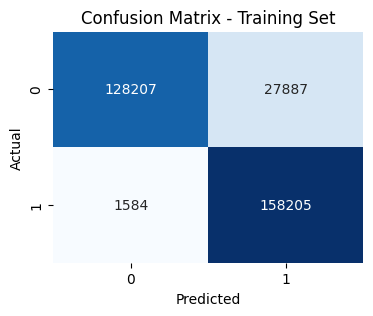


-------------------------------------------
Evaluation on: Test Set
-------------------------------------------
Accuracy:       0.8126
Precision:      0.0019
Recall:         0.2692
F1-score:       0.0037
ROC-AUC:        0.5997

Classification report:
              precision    recall  f1-score   support

         0.0     0.9988    0.8134    0.8966     19974
         1.0     0.0019    0.2692    0.0037        26

    accuracy                         0.8126     20000
   macro avg     0.5004    0.5413    0.4502     20000
weighted avg     0.9975    0.8126    0.8954     20000



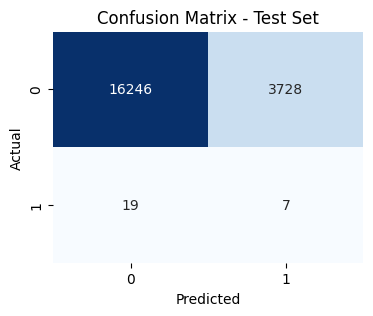

In [4]:
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Train a simple baseline model (Random Forest)
# ------------------------------------------------------------

print("Training baseline RandomForest model...")

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Train on the resampled training set (after SMOTE)
model.fit(X_train, y_train)

# ------------------------------------------------------------
# Run evaluation on training and test sets
# ------------------------------------------------------------

evaluate_model(model, X_train, y_train, title="Training Set")
evaluate_model(model, X_test, y_test, title="Test Set")

---

### Additional Models for Comparison

Testing multiple algorithms to find the best performer for fraud detection:
- **XGBoost**: Gradient boosting with high performance
- **LightGBM**: Fast gradient boosting optimized for large datasets
- **Logistic Regression**: Simple linear baseline model
- **LOF (Local Outlier Factor)**: Anomaly detection approach

TRAINING XGBOOST MODEL


c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:07:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



-------------------------------------------
Evaluation on: XGBoost - Training Set
-------------------------------------------
Accuracy:       0.9994
Precision:      0.9999
Recall:         0.9990
F1-score:       0.9994
ROC-AUC:        1.0000

Classification report:
              precision    recall  f1-score   support

         0.0     0.9990    0.9999    0.9994    156094
         1.0     0.9999    0.9990    0.9994    159789

    accuracy                         0.9994    315883
   macro avg     0.9994    0.9994    0.9994    315883
weighted avg     0.9994    0.9994    0.9994    315883



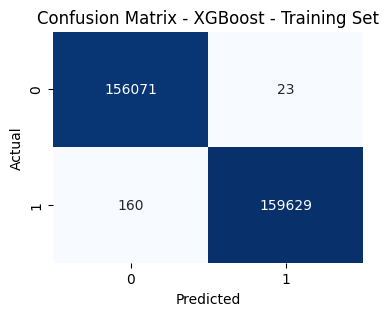


-------------------------------------------
Evaluation on: XGBoost - Test Set
-------------------------------------------
Accuracy:       0.9974
Precision:      0.0000
Recall:         0.0000
F1-score:       0.0000
ROC-AUC:        0.5669

Classification report:
              precision    recall  f1-score   support

         0.0     0.9987    0.9987    0.9987     19974
         1.0     0.0000    0.0000    0.0000        26

    accuracy                         0.9974     20000
   macro avg     0.4993    0.4993    0.4993     20000
weighted avg     0.9974    0.9974    0.9974     20000



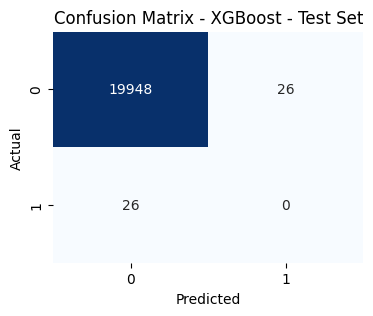

In [5]:
# ============================================================================
# MODEL : XGBoost Classifier
# ============================================================================

import xgboost as xgb


print("TRAINING XGBOOST MODEL")


xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

# Evaluate
evaluate_model(xgb_model, X_train, y_train, title="XGBoost - Training Set")
evaluate_model(xgb_model, X_test, y_test, title="XGBoost - Test Set")
    


TRAINING LIGHTGBM MODEL

-------------------------------------------
Evaluation on: LightGBM - Training Set
-------------------------------------------
Accuracy:       0.9979
Precision:      0.9999
Recall:         0.9960
F1-score:       0.9979
ROC-AUC:        0.9999

Classification report:
              precision    recall  f1-score   support

         0.0     0.9959    0.9999    0.9979    156094
         1.0     0.9999    0.9960    0.9979    159789

    accuracy                         0.9979    315883
   macro avg     0.9979    0.9979    0.9979    315883
weighted avg     0.9979    0.9979    0.9979    315883



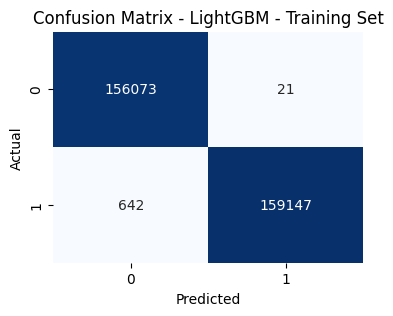


-------------------------------------------
Evaluation on: LightGBM - Test Set
-------------------------------------------
Accuracy:       0.9984
Precision:      0.0000
Recall:         0.0000
F1-score:       0.0000
ROC-AUC:        0.5873

Classification report:
              precision    recall  f1-score   support

         0.0     0.9987    0.9997    0.9992     19974
         1.0     0.0000    0.0000    0.0000        26

    accuracy                         0.9984     20000
   macro avg     0.4993    0.4998    0.4996     20000
weighted avg     0.9974    0.9984    0.9979     20000



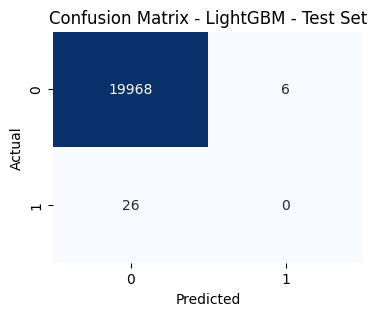

In [6]:
# ============================================================================
# MODEL: LightGBM Classifier
# ============================================================================

import lightgbm as lgb

print("TRAINING LIGHTGBM MODEL")

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1  # Suppress warnings
)

lgb_model.fit(X_train, y_train)

# Evaluate
evaluate_model(lgb_model, X_train, y_train, title="LightGBM - Training Set")
evaluate_model(lgb_model, X_test, y_test, title="LightGBM - Test Set")
    


TRAINING LOGISTIC REGRESSION MODEL

-------------------------------------------
Evaluation on: Logistic Regression - Training Set
-------------------------------------------
Accuracy:       0.5545
Precision:      0.5538
Recall:         0.6145
F1-score:       0.5825
ROC-AUC:        0.5757

Classification report:
              precision    recall  f1-score   support

         0.0     0.5555    0.4931    0.5224    156094
         1.0     0.5538    0.6145    0.5825    159789

    accuracy                         0.5545    315883
   macro avg     0.5546    0.5538    0.5525    315883
weighted avg     0.5546    0.5545    0.5528    315883



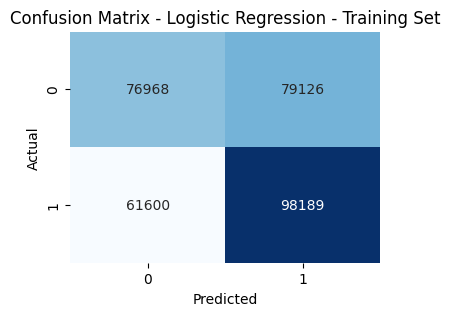


-------------------------------------------
Evaluation on: Logistic Regression - Test Set
-------------------------------------------
Accuracy:       0.4919
Precision:      0.0015
Recall:         0.5769
F1-score:       0.0029
ROC-AUC:        0.5424

Classification report:
              precision    recall  f1-score   support

         0.0     0.9989    0.4917    0.6590     19974
         1.0     0.0015    0.5769    0.0029        26

    accuracy                         0.4919     20000
   macro avg     0.5002    0.5343    0.3310     20000
weighted avg     0.9976    0.4919    0.6582     20000



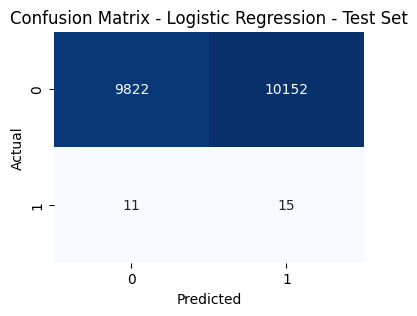

In [7]:
# ============================================================================
# MODEL: Logistic Regression
# ============================================================================
from sklearn.linear_model import LogisticRegression

print("TRAINING LOGISTIC REGRESSION MODEL")

lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    solver='saga',  # Fast solver for large datasets
    penalty='l2'
)

lr_model.fit(X_train, y_train)

# Evaluate
evaluate_model(lr_model, X_train, y_train, title="Logistic Regression - Training Set")
evaluate_model(lr_model, X_test, y_test, title="Logistic Regression - Test Set")

TRAINING LOCAL OUTLIER FACTOR (LOF) MODEL

Note: LOF is an unsupervised anomaly detection method.
Predictions: -1 = outlier (fraud), 1 = inlier (legitimate)

Using 50,000 samples for LOF training...


c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



-------------------------------------------
Evaluation on: LOF - Training Set
-------------------------------------------
Accuracy:       0.4666
Precision:      0.3608
Recall:         0.0706
F1-score:       0.1181
ROC-AUC:        0.4178

Classification report:
              precision    recall  f1-score   support

         0.0     0.4782    0.8720    0.6177    156094
         1.0     0.3608    0.0706    0.1181    159789

    accuracy                         0.4666    315883
   macro avg     0.4195    0.4713    0.3679    315883
weighted avg     0.4188    0.4666    0.3649    315883



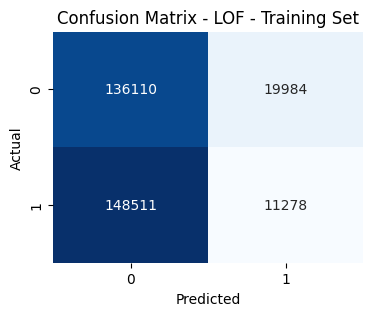

c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



-------------------------------------------
Evaluation on: LOF - Test Set
-------------------------------------------
Accuracy:       0.8578
Precision:      0.0011
Recall:         0.1154
F1-score:       0.0021
ROC-AUC:        0.5804

Classification report:
              precision    recall  f1-score   support

         0.0     0.9987    0.8587    0.9234     19974
         1.0     0.0011    0.1154    0.0021        26

    accuracy                         0.8578     20000
   macro avg     0.4999    0.4871    0.4628     20000
weighted avg     0.9974    0.8578    0.9222     20000



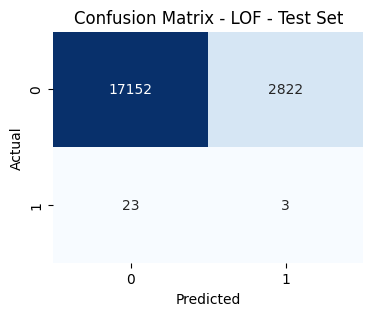

In [8]:
# ============================================================================
# MODEL: Local Outlier Factor (LOF) - Anomaly Detection
# ============================================================================

print("TRAINING LOCAL OUTLIER FACTOR (LOF) MODEL")

from sklearn.neighbors import LocalOutlierFactor

print("\nNote: LOF is an unsupervised anomaly detection method.")
print("Predictions: -1 = outlier (fraud), 1 = inlier (legitimate)")

# Use a sample for LOF training (it can be memory-intensive)
sample_size = min(50000, len(X_train))
print(f"\nUsing {sample_size:,} samples for LOF training...")

X_train_sample = X_train.sample(sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

lof_model = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1,  # Expected proportion of outliers
    novelty=True,  # Allow prediction on new data
    n_jobs=-1
)

lof_model.fit(X_train_sample)

# Define custom evaluation function for LOF
def evaluate_lof(model, X, y, title="Dataset"):
    """Evaluate LOF performance (predictions are -1 for outliers, 1 for inliers)."""
    preds_lof = model.predict(X)
    
    # Convert LOF predictions: -1 (outlier/fraud) → 1, 1 (inlier/legitimate) → 0
    preds = np.where(preds_lof == -1, 1, 0)
    
    # LOF decision_function returns anomaly scores (lower = more anomalous)
    scores = -model.decision_function(X)  # Invert so higher = more fraudulent
    
    print("\n-------------------------------------------")
    print(f"Evaluation on: {title}")
    print("-------------------------------------------")
    print(f"Accuracy:       {accuracy_score(y, preds):.4f}")
    print(f"Precision:      {precision_score(y, preds, zero_division=0):.4f}")
    print(f"Recall:         {recall_score(y, preds, zero_division=0):.4f}")
    print(f"F1-score:       {f1_score(y, preds, zero_division=0):.4f}")
    print(f"ROC-AUC:        {roc_auc_score(y, scores):.4f}")
    
    print("\nClassification report:")
    print(classification_report(y, preds, digits=4, zero_division=0))
    
    # Confusion matrix
    cm = confusion_matrix(y, preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate on training and test set
evaluate_lof(lof_model, X_train, y_train, title="LOF - Training Set")
evaluate_lof(lof_model, X_test, y_test, title="LOF - Test Set")


#### MODEL COMPARISON SUMMARY

📊 MODEL PERFORMANCE COMPARISON SUMMARY

⏳ Collecting metrics from all models on test set...


c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\DELL\Documents\ProjetEcole\Financial-Fraud-Detection\python_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(



Comparison complete!
TEST SET PERFORMANCE COMPARISON
                  Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
          Random Forest   0.81265   0.001874 0.269231  0.003722 0.599658
                XGBoost   0.99740   0.000000 0.000000  0.000000 0.566941
               LightGBM   0.99840   0.000000 0.000000  0.000000 0.587302
    Logistic Regression   0.49185   0.001475 0.576923  0.002943 0.542409
LOF (Anomaly Detection)   0.85775   0.001062 0.115385  0.002105 0.580418

BEST MODELS BY METRIC:
   • Accuracy    : LightGBM                  (0.9984)
   • Precision   : Random Forest             (0.0019)
   • Recall      : Logistic Regression       (0.5769)
   • F1-Score    : Random Forest             (0.0037)
   • ROC-AUC     : Random Forest             (0.5997)


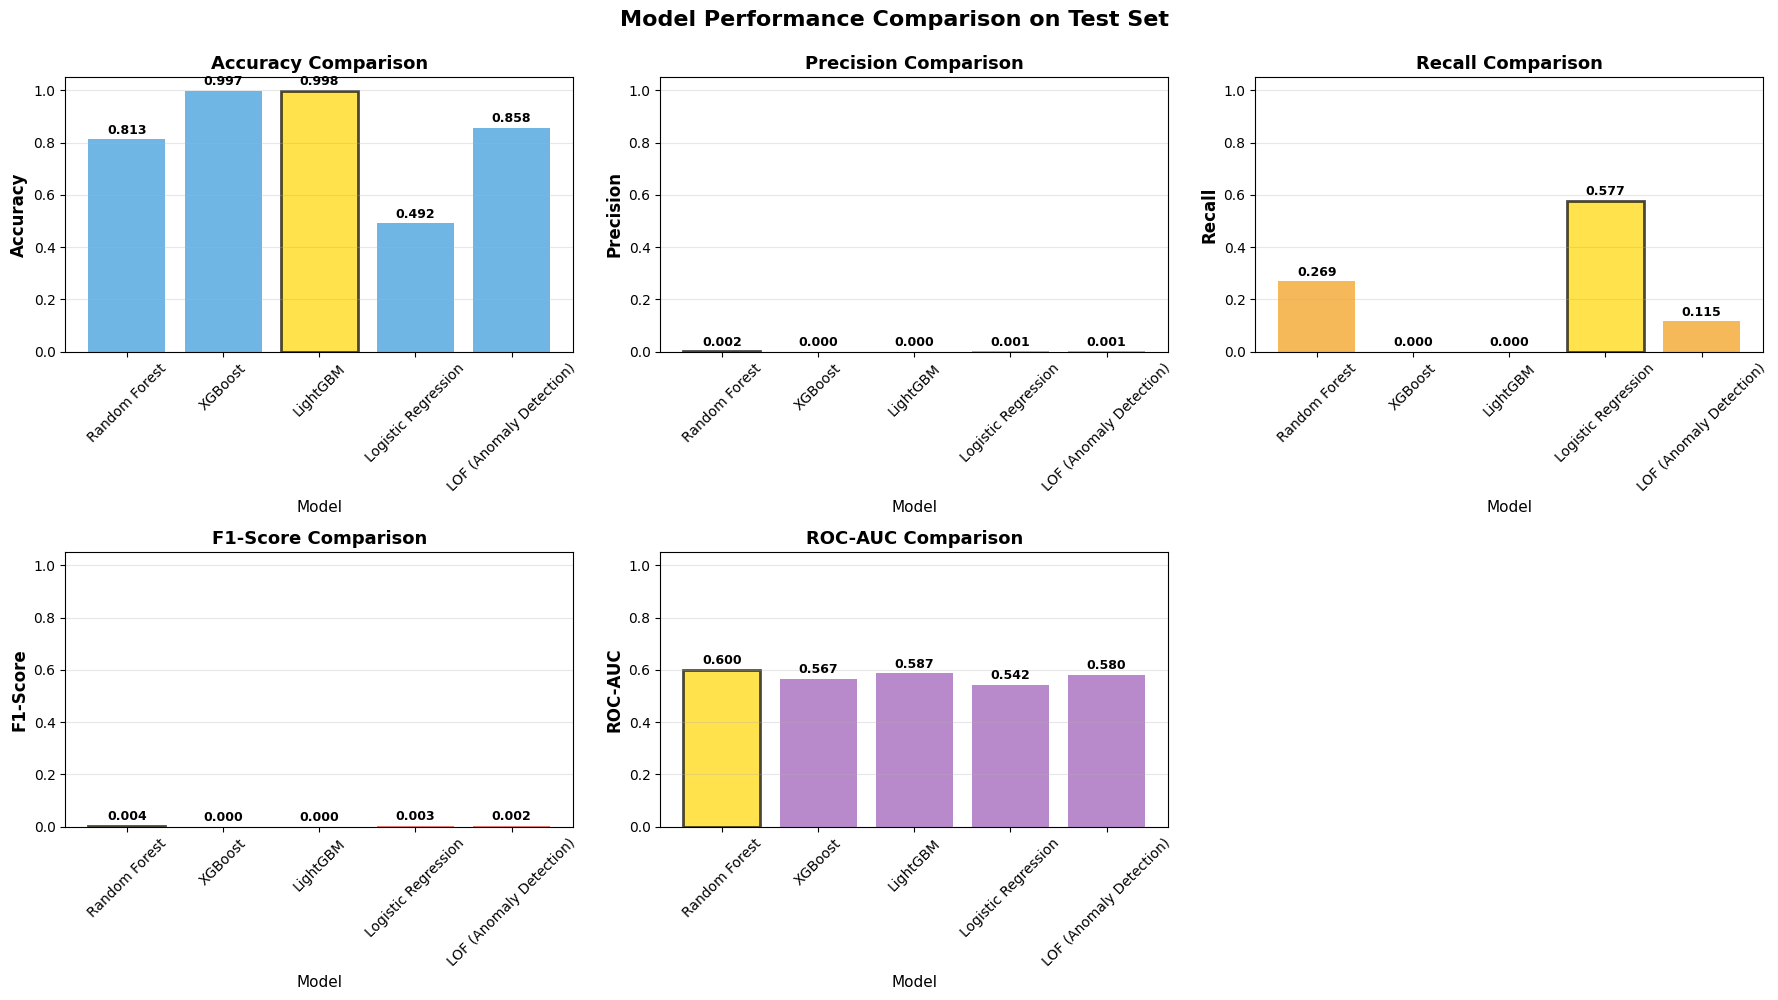

In [9]:
# ============================================================================
# MODEL COMPARISON SUMMARY
# ============================================================================

print("📊 MODEL PERFORMANCE COMPARISON SUMMARY")

# Create a comparison table
comparison_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}

# Helper function to extract metrics
def get_metrics(model, X, y, model_name, is_lof=False):
    """Extract performance metrics for a model."""
    if is_lof:
        preds_lof = model.predict(X)
        preds = np.where(preds_lof == -1, 1, 0)
        scores = -model.decision_function(X)
    else:
        preds = model.predict(X)
        scores = model.predict_proba(X)[:, 1]
    
    comparison_results['Model'].append(model_name)
    comparison_results['Accuracy'].append(accuracy_score(y, preds))
    comparison_results['Precision'].append(precision_score(y, preds, zero_division=0))
    comparison_results['Recall'].append(recall_score(y, preds, zero_division=0))
    comparison_results['F1-Score'].append(f1_score(y, preds, zero_division=0))
    comparison_results['ROC-AUC'].append(roc_auc_score(y, scores))

# Collect metrics for all models on test set
print("\n⏳ Collecting metrics from all models on test set...")

# Random Forest (already trained)
get_metrics(model, X_test, y_test, "Random Forest")
get_metrics(xgb_model, X_test, y_test, "XGBoost")
get_metrics(lgb_model, X_test, y_test, "LightGBM")
get_metrics(lr_model, X_test, y_test, "Logistic Regression")
get_metrics(lof_model, X_test, y_test, "LOF (Anomaly Detection)", is_lof=True)

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_results)

# Display results
print("\nComparison complete!")
print("TEST SET PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))

# Identify best model for each metric
print("\nBEST MODELS BY METRIC:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"   • {metric:12s}: {best_model:25s} ({best_score:.4f})")

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors[idx], alpha=0.7)
    
    # Highlight best model
    best_idx = comparison_df[metric].idxmax()
    bars[best_idx].set_color('gold')
    bars[best_idx].set_edgecolor('black')
    bars[best_idx].set_linewidth(2)
    
    ax.set_ylabel(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('Model', fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.05)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, comparison_df[metric])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Hide the 6th subplot
axes[5].axis('off')

plt.suptitle('Model Performance Comparison on Test Set', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()